# MNIST using Keras

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt


Using TensorFlow backend.


## Download the MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
plt.subplot(221) 
plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap = plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap = plt.get_cmap('gray'))

`plt.subplot(221) `

2 - nrows

2 - ncols

1 - plot_number

> In the case when nrows, ncols and plot_number are all less than 10, a convenience exists, such that the a 3 digit number can be given instead, where the hundreds represent nrows, the tens represent ncols and the units represent plot_number. 

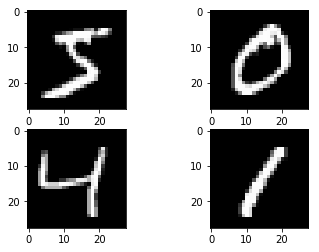

In [4]:
plt.show()

## Explore the dataset

one digit is represent in 28x28 pixels

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

60,000 data, each of this is a 28x28 pixels

## Baseline model with multi-later perceptrons

simple neural network model with a single hidden layer

In [7]:
import numpy as np
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [8]:
seed = 7
np.random.seed(seed)

In [9]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()
num_pixels = X_train.shape[1] * X_train.shape[2]
num_pixels

784

flatten 28*28 images to a long vector (784 slots)

In [10]:
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

reshape function:
- array
- newshape (int)



normalize the data. the values are scale between 0 and 255

In [11]:
X_train = X_train / 255
X_test = X_test / 255

hot encoding the categorical values

In [12]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [13]:
num_classes = y_test.shape[1]

In [14]:
num_classes

10

In [15]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, kernel_initializer = 'normal', activation = 'relu'))
    # output layer
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

- use `softmax` activation on output layer.
- categorical_crossentropy = logarithmic loss.
- `adam` optimization.
- There is one hiden layer.
- `softmax` activation turn the outputs into proability-like values


In [16]:
model = baseline_model()
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10, batch_size=200,verbose=2)
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
8s - loss: 0.2789 - acc: 0.9207 - val_loss: 0.1419 - val_acc: 0.9571
Epoch 2/10
7s - loss: 0.1117 - acc: 0.9676 - val_loss: 0.0920 - val_acc: 0.9707
Epoch 3/10
7s - loss: 0.0717 - acc: 0.9795 - val_loss: 0.0789 - val_acc: 0.9771
Epoch 4/10
7s - loss: 0.0501 - acc: 0.9858 - val_loss: 0.0745 - val_acc: 0.9764
Epoch 5/10
8s - loss: 0.0372 - acc: 0.9892 - val_loss: 0.0669 - val_acc: 0.9797
Epoch 6/10
7s - loss: 0.0268 - acc: 0.9928 - val_loss: 0.0634 - val_acc: 0.9804
Epoch 7/10
7s - loss: 0.0207 - acc: 0.9945 - val_loss: 0.0624 - val_acc: 0.9810
Epoch 8/10
8s - loss: 0.0143 - acc: 0.9968 - val_loss: 0.0635 - val_acc: 0.9794
Epoch 9/10
7s - loss: 0.0111 - acc: 0.9978 - val_loss: 0.0590 - val_acc: 0.9816
Epoch 10/10
10s - loss: 0.0079 - acc: 0.9985 - val_loss: 0.0575 - val_acc: 0.9816
Baseline Error: 1.84%


## Simple convolutional neural network for MNIST

In [17]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
X_test = X_test.reshape(X_test.shape[0],1,28,28).astype('float32')

In [19]:
X_train[0].shape

(1, 28, 28)

normalize the data, gray color has value range between 0 and 255

In [20]:
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [21]:
y_test.shape

(10000, 10)

In [22]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape = (1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

1st hidden layer:
- convolutional layer(Convolution2D)
- has 32 features
- rectifier activation function
- expect image with the structure outline [pixel][width][height]

2nd layer:
- pooling layer
- MaxPooling2D
- size 2x2

3rd layer:
- regulasize layer
- using dropout called Dropout
- randomly exclude 20% of neurons, reduce overfitting

4th layer:
- Convert 2D matrix to a vector

5th layer:
- connect 128 neurons

6th layer:
- 10 neurons for the 10 classes
- softmax activation func

In [23]:
model = baseline_model()

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
182s - loss: 0.2457 - acc: 0.9298 - val_loss: 0.0733 - val_acc: 0.9779
Epoch 2/10
184s - loss: 0.0736 - acc: 0.9785 - val_loss: 0.0480 - val_acc: 0.9852
Epoch 3/10
150s - loss: 0.0525 - acc: 0.9844 - val_loss: 0.0401 - val_acc: 0.9873
Epoch 4/10
138s - loss: 0.0400 - acc: 0.9876 - val_loss: 0.0386 - val_acc: 0.9877
Epoch 5/10
155s - loss: 0.0339 - acc: 0.9893 - val_loss: 0.0446 - val_acc: 0.9863
Epoch 6/10
148s - loss: 0.0280 - acc: 0.9911 - val_loss: 0.0346 - val_acc: 0.9884
Epoch 7/10
154s - loss: 0.0231 - acc: 0.9922 - val_loss: 0.0352 - val_acc: 0.9884
Epoch 8/10
149s - loss: 0.0206 - acc: 0.9937 - val_loss: 0.0290 - val_acc: 0.9906
Epoch 9/10
142s - loss: 0.0172 - acc: 0.9945 - val_loss: 0.0365 - val_acc: 0.9886
Epoch 10/10
136s - loss: 0.0151 - acc: 0.9951 - val_loss: 0.0319 - val_acc: 0.9896
Baseline Error: 1.04%


## Larger convolutional neural network for MNIST

In [24]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [25]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [26]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [27]:
X_train = X_train / 255
X_test = X_test / 255

In [28]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [29]:
def larger_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape = (1, 28 ,28), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

1st hidden layer:
- convolutional layer(Convolution2D)
- has 30 features
- rectifier activation function
- expect image with the structure outline [pixel][width][height]
- map of size 5x5

2nd layer:
- pooling layer
- MaxPooling2D
- size 2x2

3rd layer:
- convolutional layer(Convolution2D)
- has 15 features
- rectifier activation function
- map of size 3x3

4th layer:
- pooling layer
- MaxPooling2D
- size 2x2

5th layer:
- regulasize layer
- using dropout called Dropout
- randomly exclude 20% of neurons, reduce overfitting

4th layer:
- Convert 2D matrix to a vector

5th layer:
- connect 128 neurons and rectifier activation

6th layer:
- connect 50 neurons and rectifier activation

6th layer:
- 10 neurons for the 10 classes
- softmax activation func

In [30]:
model = larger_model()
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200)

scores = model.evaluate(X_test, y_test, verbose = 0)
print("Large CNN Error: %.2f%%" % (100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 166s - loss: 0.3772 - acc: 0.8835 - val_loss: 0.0867 - val_acc: 0.9723
Epoch 2/10
60000/60000 [==============================] - 167s - loss: 0.0977 - acc: 0.9694 - val_loss: 0.0554 - val_acc: 0.9824
Epoch 3/10
60000/60000 [==============================] - 174s - loss: 0.0703 - acc: 0.9777 - val_loss: 0.0433 - val_acc: 0.9861
Epoch 4/10
60000/60000 [==============================] - 163s - loss: 0.0572 - acc: 0.9820 - val_loss: 0.0363 - val_acc: 0.9879
Epoch 5/10
60000/60000 [==============================] - 167s - loss: 0.0491 - acc: 0.9844 - val_loss: 0.0302 - val_acc: 0.9894
Epoch 6/10
60000/60000 [==============================] - 167s - loss: 0.0430 - acc: 0.9864 - val_loss: 0.0323 - val_acc: 0.9890
Epoch 7/10
60000/60000 [==============================] - 167s - loss: 0.0387 - acc: 0.9875 - val_loss: 0.0309 - val_acc: 0.9899
Epoch 8/10
60000/60000 [=======================